In [ ]:
import pandas as pd
df=pd.read_excel('customer_data.xlsx')
df.head(6)


,customer_id,age,gender,annual_income,last_visited_days_ago,session_duration,pages_visited,device,purchase
0,1,56.0,male,NaN,7.0,17.0,15.0,desktop,0
1,2,69.0,female,47617.0,4.0,35.0,19.0,mobile,0
2,3,46.0,male,94258.0,30.0,NaN,15.0,mobile,0
3,4,32.0,female,70075.0,19.0,4.0,12.0,mobile,0
4,5,60.0,male,146998.0,16.0,51.0,NaN,mobile,0
5,6,25.0,male,42631.0,8.0,31.0,16.0,desktop,1


In [ ]:
df.nunique()

,0
customer_id,10000
age,53
gender,2
annual_income,8788
last_visited_days_ago,31
session_duration,60
pages_visited,20
device,3
purchase,2


In [ ]:
df=df.drop(['customer_id'],axis=1)

In [ ]:

df=df.drop_duplicates()

In [ ]:
df.shape

(10000, 8)

In [ ]:
df.isnull().sum()

,0
age,1000
gender,1000
annual_income,1000
last_visited_days_ago,1000
session_duration,1000
pages_visited,1000
device,0
purchase,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    9000 non-null   float64
 1   gender                 9000 non-null   object 
 2   annual_income          9000 non-null   float64
 3   last_visited_days_ago  9000 non-null   float64
 4   session_duration       9000 non-null   float64
 5   pages_visited          9000 non-null   float64
 6   device                 10000 non-null  object 
 7   purchase               10000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 625.1+ KB


In [ ]:
if df['annual_income'].lt(0).any():
    print("There are negative values in 'annual_income'.")
else:
    print("There are no negative values in 'annual_income'.")

There are no negative values in 'annual_income'.


In [ ]:
float_cols = df.select_dtypes(include=['float64']).columns

# Convert float columns to integer columns
for col in float_cols:
    # Handle potential errors during conversion (e.g., NaN values)
    df[col] = pd.to_numeric(df[col], errors='coerce').astype('Int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   age                    9000 non-null   Int64 
 1   gender                 9000 non-null   object
 2   annual_income          9000 non-null   Int64 
 3   last_visited_days_ago  9000 non-null   Int64 
 4   session_duration       9000 non-null   Int64 
 5   pages_visited          9000 non-null   Int64 
 6   device                 10000 non-null  object
 7   purchase               10000 non-null  int64 
dtypes: Int64(5), int64(1), object(2)
memory usage: 674.0+ KB


In [ ]:
df.describe()

,age,annual_income,last_visited_days_ago,session_duration,pages_visited,purchase
count,9000.0,9000.0,9000.0,9000.0,9000.0,10000.000000
mean,44.109333,109628.591111,15.018111,30.818111,10.457556,0.303100
std,15.220279,51990.151925,8.90681,17.280978,5.757072,0.459621
min,18.0,20016.0,0.0,1.0,1.0,0.000000
25%,31.0,64318.5,7.0,16.0,6.0,0.000000
50%,44.0,110326.5,15.0,31.0,10.0,0.000000
75%,57.0,154725.25,23.0,46.0,15.0,1.000000
max,70.0,199971.0,30.0,60.0,20.0,1.000000


In [ ]:
import numpy as np
medians = df.median(numeric_only=True)
print(medians)

age                          44.0
annual_income            110326.5
last_visited_days_ago        15.0
session_duration             31.0
pages_visited                10.0
purchase                      0.0
dtype: Float64


In [ ]:
# For numeric columns
# Mean Imputation for Age and converting to int64
# df=df.drop(['customer_id'],axis=1)
df=df.drop_duplicates()
df['age'].fillna(int(df['age'].mean()), inplace=True)

# Median Imputation for Annual Income and converting to int64
df['annual_income'].fillna(int(df['annual_income'].median()), inplace=True)
# Mean Imputation for Last Visited Days Ago and converting to int64
df['last_visited_days_ago'].fillna(int(df['last_visited_days_ago'].mean()), inplace=True)
# Mean Imputation for Session Duration and converting to int64
df['session_duration'].fillna(int(df['session_duration'].mean()), inplace=True)

# Median Imputation for Pages Visited and converting to int64
df['pages_visited'].fillna(int(df['pages_visited'].median()), inplace=True)

# For categorical columns
df['gender'].fillna(df['gender'].mode()[0], inplace=True)  # Mode Imputation for Gender

# Re-check statistics after imputation
updated_summary = df.describe()
updated_null_counts = df.isnull().sum()

updated_summary, updated_null_counts


<ipython-input-12-ed6bbd9be4a8>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(int(df['age'].mean()), inplace=True)
<ipython-input-12-ed6bbd9be4a8>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

(             age  annual_income  last_visited_days_ago  session_duration  \
 count    10000.0        10000.0                10000.0           10000.0   
 mean     44.0984     109698.332                15.0163           30.7363   
 std    14.439182   49322.358555               8.449697         16.395922   
 min         18.0        20016.0                    0.0               1.0   
 25%         33.0       69246.75                    8.0              18.0   
 50%         44.0       110326.0                   15.0              30.0   
 75%         56.0      149851.75                   22.0              44.0   
 max         70.0       199971.0                   30.0              60.0   
 
        pages_visited      purchase  
 count        10000.0  10000.000000  
 mean         10.4118      0.303100  
 std         5.463333      0.459621  
 min              1.0      0.000000  
 25%              6.0      0.000000  
 50%             10.0      0.000000  
 75%             15.0      1.000000  
 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   age                    10000 non-null  Int64 
 1   gender                 10000 non-null  object
 2   annual_income          10000 non-null  Int64 
 3   last_visited_days_ago  10000 non-null  Int64 
 4   session_duration       10000 non-null  Int64 
 5   pages_visited          10000 non-null  Int64 
 6   device                 10000 non-null  object
 7   purchase               10000 non-null  int64 
dtypes: Int64(5), int64(1), object(2)
memory usage: 674.0+ KB


In [ ]:
df.describe()

,age,annual_income,last_visited_days_ago,session_duration,pages_visited,purchase
count,10000.0,10000.0,10000.0,10000.0,10000.0,10000.000000
mean,44.0984,109698.332,15.0163,30.7363,10.4118,0.303100
std,14.439182,49322.358555,8.449697,16.395922,5.463333,0.459621
min,18.0,20016.0,0.0,1.0,1.0,0.000000
25%,33.0,69246.75,8.0,18.0,6.0,0.000000
50%,44.0,110326.0,15.0,30.0,10.0,0.000000
75%,56.0,149851.75,22.0,44.0,15.0,1.000000
max,70.0,199971.0,30.0,60.0,20.0,1.000000


In [ ]:
def handle_outliers_and_fill_missing(df):
    # Define a function to remove outliers using IQR method
    def remove_outliers(df, column):
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[column] = df[column].apply(lambda x: df[column].median() if x < lower_bound or x > upper_bound else x)

    # Handle numeric columns
    numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

    for column in numeric_columns:
        # Remove outliers using IQR method
        remove_outliers(df, column)

        # Fill missing values with median (if any missing values exist)
        if df[column].isnull().sum() > 0:
            df[column].fillna(df[column].median(), inplace=True)

    # Handle categorical columns
    categorical_columns = df.select_dtypes(include=['object']).columns

    for column in categorical_columns:
        # Fill missing values with the mode (most frequent value)
        if df[column].isnull().sum() > 0:
            df[column].fillna(df[column].mode()[0], inplace=True)

    return df

# Apply the function to handle outliers and missing values
df = handle_outliers_and_fill_missing(df)

In [ ]:
df.describe()

,age,annual_income,last_visited_days_ago,session_duration,pages_visited,purchase
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,44.098400,109698.332000,15.016300,30.736300,10.411800,0.303100
std,14.439182,49322.358555,8.449697,16.395922,5.463333,0.459621
min,18.000000,20016.000000,0.000000,1.000000,1.000000,0.000000
25%,33.000000,69246.750000,8.000000,18.000000,6.000000,0.000000
50%,44.000000,110326.000000,15.000000,30.000000,10.000000,0.000000
75%,56.000000,149851.750000,22.000000,44.000000,15.000000,1.000000
max,70.000000,199971.000000,30.000000,60.000000,20.000000,1.000000


In [ ]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
skewness = df[numeric_columns].skew()

# Print the skewness of each numeric column
print("Skewness of numeric columns:")
print(skewness)

Skewness of numeric columns:
age                     -0.000286
annual_income           -0.015249
last_visited_days_ago    0.004018
session_duration        -0.006020
pages_visited            0.050364
purchase                 0.856964
dtype: float64


                            age  annual_income  last_visited_days_ago  \
age                    1.000000      -0.011991               0.006963   
annual_income         -0.011991       1.000000              -0.005860   
last_visited_days_ago  0.006963      -0.005860               1.000000   
session_duration       0.008858      -0.012200              -0.003743   
pages_visited         -0.012198      -0.001832              -0.015568   
purchase              -0.004570       0.001845              -0.021152   

                       session_duration  pages_visited  purchase  
age                            0.008858      -0.012198 -0.004570  
annual_income                 -0.012200      -0.001832  0.001845  
last_visited_days_ago         -0.003743      -0.015568 -0.021152  
session_duration               1.000000      -0.008087  0.016274  
pages_visited                 -0.008087       1.000000 -0.005901  
purchase                       0.016274      -0.005901  1.000000  


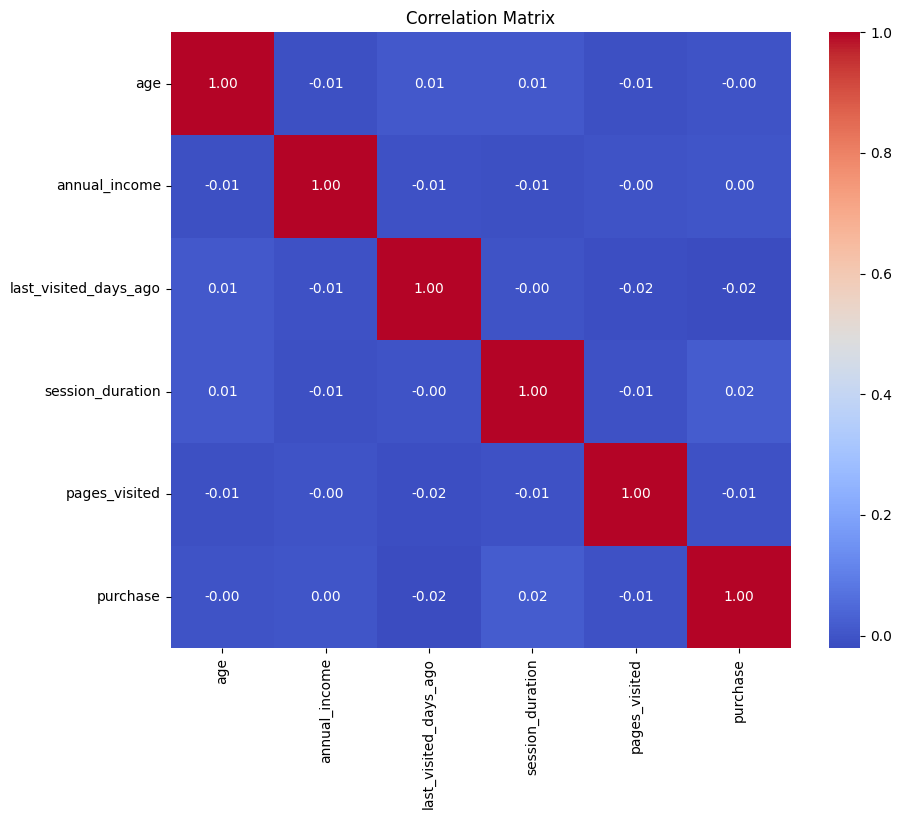

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

# Compute the correlation matrix for numeric columns
corr_matrix = numeric_columns.corr()
print(corr_matrix)
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


In [ ]:
from sklearn.preprocessing import QuantileTransformer

# Initialize the QuantileTransformer
quantile_transformer = QuantileTransformer(output_distribution='normal', random_state=42)
df[['annual_income','pages_visited']] = quantile_transformer.fit_transform(df[['annual_income','pages_visited']])

# Check skewness after transformation
print(df[['annual_income','pages_visited']].skew())

annual_income   -0.003730
pages_visited    0.038017
dtype: float64



Training Set Metrics with Threshold Adjustment:
Accuracy: 0.99
Precision: 0.96
Recall: 1.00
F1 Score: 0.98
Confusion Matrix:
[[4773   90]
 [   0 2137]]

Test Set Metrics with Threshold Adjustment:
Accuracy: 0.99
Precision: 0.96
Recall: 1.00
F1 Score: 0.98
Confusion Matrix:
[[2064   42]
 [   0  894]]


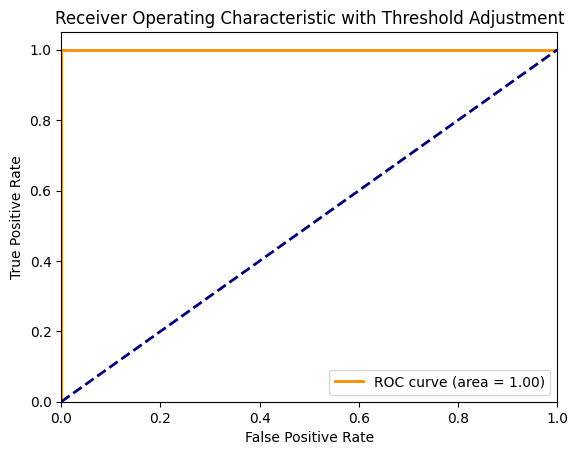

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score

# Sample data
# df = pd.read_csv('your_data.csv')

# Encode categorical variables
label_encoders = {}
for column in ['gender', 'device']:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Separate features and target
X = df.drop('purchase', axis=1)
y = df['purchase']

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split purchased and not purchased data
purchased_data = df[df['purchase'] == 1]
not_purchased_data = df[df['purchase'] == 0]

# Bagging parameters
n_models = 15
n_samples = 6400

models = []
for i in range(n_models):
    # Ensure all purchased data is included
    sample_purchased = purchased_data.iloc[:3031]

    # Randomly sample from not purchased data
    sample_not_purchased = not_purchased_data.sample(n=n_samples - len(sample_purchased), replace=True, random_state=i)

    # Combine the samples
    sample_data = pd.concat([sample_purchased, sample_not_purchased])

    # Separate features and target for this sample
    X_sample = sample_data.drop('purchase', axis=1)
    y_sample = sample_data['purchase']

    # Scale the sample data
    X_sample_scaled = scaler.transform(X_sample)

    # Train a model on the sample data
    model = DecisionTreeClassifier(random_state=i)
    model.fit(X_sample_scaled, y_sample)
    models.append(model)

# To evaluate the models, we can use a test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3
                                                    , random_state=42)

# Predictions on the test set
predictions = np.zeros((X_test.shape[0], len(models)))
train_predictions = np.zeros((X_train.shape[0], len(models)))

for i, model in enumerate(models):
    predictions[:, i] = model.predict(X_test)
    train_predictions[:, i] = model.predict(X_train)

# Majority voting for final prediction
final_predictions = np.round(np.mean(predictions, axis=1)).astype(int)
final_train_predictions = np.round(np.mean(train_predictions, axis=1)).astype(int)

# Adjusting threshold
threshold = 0.64  # Example threshold value

# Compute probabilities for test set
probabilities = np.mean(predictions, axis=1)  # Average probabilities across models

# Compute probabilities for training set
train_probabilities = np.mean(train_predictions, axis=1)  # Average probabilities across models

# Adjust predictions for training and test sets based on the threshold
final_train_predictions_threshold = (train_probabilities >= threshold).astype(int)
final_test_predictions_threshold = (probabilities >= threshold).astype(int)

# Evaluate the metrics on the test set with adjusted threshold
accuracy_test_thresh = accuracy_score(y_test, final_test_predictions_threshold)
precision_test_thresh = precision_score(y_test, final_test_predictions_threshold)
recall_test_thresh = recall_score(y_test, final_test_predictions_threshold)
f1_test_thresh = f1_score(y_test, final_test_predictions_threshold)
conf_matrix_test_thresh = confusion_matrix(y_test, final_test_predictions_threshold)

# Evaluate the metrics on the training set with adjusted threshold
accuracy_train_thresh = accuracy_score(y_train, final_train_predictions_threshold)
precision_train_thresh = precision_score(y_train, final_train_predictions_threshold)
recall_train_thresh = recall_score(y_train, final_train_predictions_threshold)
f1_train_thresh = f1_score(y_train, final_train_predictions_threshold)
conf_matrix_train_thresh = confusion_matrix(y_train, final_train_predictions_threshold)

# Display results for training set with adjusted threshold
print('\nTraining Set Metrics with Threshold Adjustment:')
print(f'Accuracy: {accuracy_train_thresh:.2f}')
print(f'Precision: {precision_train_thresh:.2f}')
print(f'Recall: {recall_train_thresh:.2f}')
print(f'F1 Score: {f1_train_thresh:.2f}')
print('Confusion Matrix:')
print(conf_matrix_train_thresh)

# Display results for test set with adjusted threshold
print('\nTest Set Metrics with Threshold Adjustment:')
print(f'Accuracy: {accuracy_test_thresh:.2f}')
print(f'Precision: {precision_test_thresh:.2f}')
print(f'Recall: {recall_test_thresh:.2f}')
print(f'F1 Score: {f1_test_thresh:.2f}')
print('Confusion Matrix:')
print(conf_matrix_test_thresh)

# Compute ROC curve and ROC area for test set with adjusted threshold
fpr_thresh, tpr_thresh, _ = roc_curve(y_test, probabilities)
roc_auc_thresh = roc_auc_score(y_test, probabilities)

plt.figure()
plt.plot(fpr_thresh, tpr_thresh, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_thresh)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic with Threshold Adjustment')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# Randomly select 50 rows from the dataset
custom_data = df.sample(n=50, random_state=50)  # Adjust 'n' for the number of rows you want

# Encode categorical variables in custom data
for column in ['gender', 'device']:  # Replace with your actual categorical columns
    if column in custom_data.columns:
        custom_data[column] = label_encoders[column].transform(custom_data[column])

# Separate features from the custom data (assuming 'purchase' column is not included in the custom data)
X_custom = custom_data.drop('purchase', axis=1, errors='ignore')  # 'purchase' should not be in custom data
X_custom_scaled = scaler.transform(X_custom)  # Scale the custom data using the same scaler

# Make predictions using the trained models
custom_predictions = np.zeros((X_custom_scaled.shape[0], len(models)))

for i, model in enumerate(models):
    custom_predictions[:, i] = model.predict(X_custom_scaled)

# Majority voting for final prediction
final_custom_predictions = np.round(np.mean(custom_predictions, axis=1)).astype(int)

# Adjust threshold if needed (e.g., 0.64)
probabilities_custom = np.mean(custom_predictions, axis=1)  # Average probabilities across models
final_custom_predictions_threshold = (probabilities_custom >= 0.64).astype(int)

# Create a DataFrame for comparison of actual vs predicted values
comparison_df = custom_data[['purchase']].copy()  # Get the 'purchase' column (actual values)
comparison_df['Predicted'] = final_custom_predictions  # Add predicted values using majority voting
comparison_df['Predicted with Threshold'] = final_custom_predictions_threshold  # Add predicted values with threshold adjustment

# Display the comparison DataFrame
print("Comparison of Actual and Predicted Values:")
print(comparison_df)


Comparison of Actual and Predicted Values:
      purchase  Predicted  Predicted with Threshold
9102         0          0                         0
7868         0          1                         0
4176         0          0                         0
4161         1          1                         1
8770         0          0                         0
8919         0          1                         0
3884         0          1                         0
1590         1          1                         1
617          0          0                         0
1562         0          0                         0
1043         0          0                         0
3494         1          1                         1
2884         0          0                         0
1505         0          0                         0
102          1          1                         1
1912         1          1                         1
7294         0          0                         0
2464         0       

Test Set Metrics:
Accuracy: 0.82
Precision: 0.66
Recall: 0.83
F1 Score: 0.73
Confusion Matrix:
[[1721  385]
 [ 155  739]]

Training Set Metrics:
Accuracy: 0.82
Precision: 0.66
Recall: 0.82
F1 Score: 0.73
Confusion Matrix:
[[3964  899]
 [ 383 1754]]
Best parameters for model 1: {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best parameters for model 2: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best parameters for model 3: {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best parameters for model 4: {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best parameters for model 5: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best parameters for model 6: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best parameters for model 7: {'criterion': 'entrop

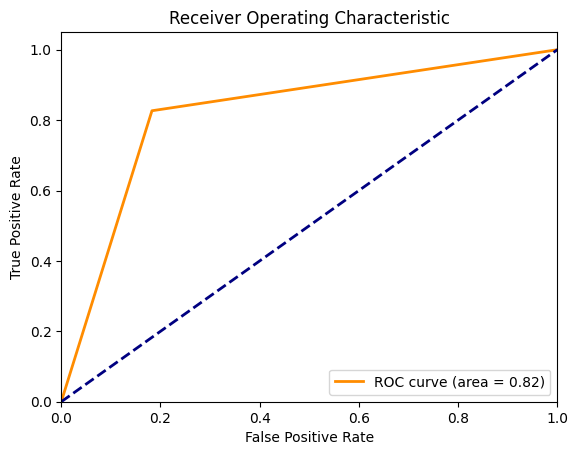

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score

# Sample data
# df = pd.read_csv('your_data.csv')

# Encode categorical variables
label_encoders = {}
for column in ['gender', 'device']:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Separate features and target
X = df.drop('purchase', axis=1)
y = df['purchase']

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split purchased and not purchased data
purchased_data = df[df['purchase'] == 1]
not_purchased_data = df[df['purchase'] == 0]

# Bagging parameters
n_models = 11
n_samples = 6400

models = []
best_params_list = []
for i in range(n_models):
    # Ensure all purchased data is included
    sample_purchased = purchased_data.iloc[:3031]

    # Randomly sample from not purchased data
    sample_not_purchased = not_purchased_data.sample(n=n_samples - len(sample_purchased), replace=True, random_state=i)

    # Combine the samples
    sample_data = pd.concat([sample_purchased, sample_not_purchased])

    # Separate features and target for this sample
    X_sample = sample_data.drop('purchase', axis=1)
    y_sample = sample_data['purchase']

    # Scale the sample data
    X_sample_scaled = scaler.transform(X_sample)

    # Perform hyperparameter tuning using GridSearchCV
    param_grid = {
        'max_depth': [5, 10, 15],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'criterion': ['gini', 'entropy']
    }
    grid_search = GridSearchCV(DecisionTreeClassifier(random_state=i), param_grid, cv=5, n_jobs=-1, scoring='f1')
    grid_search.fit(X_sample_scaled, y_sample)
    best_model = grid_search.best_estimator_
    best_params_list.append(grid_search.best_params_)

    models.append(best_model)

# To evaluate the models, we can use a test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Predictions on the test set
predictions = np.zeros((X_test.shape[0], len(models)))
train_predictions = np.zeros((X_train.shape[0], len(models)))

for i, model in enumerate(models):
    predictions[:, i] = model.predict(X_test)
    train_predictions[:, i] = model.predict(X_train)

# Majority voting for final prediction
final_predictions = np.round(np.mean(predictions, axis=1)).astype(int)
final_train_predictions = np.round(np.mean(train_predictions, axis=1)).astype(int)

# Evaluate the accuracy on test set
accuracy_test = accuracy_score(y_test, final_predictions)
precision_test = precision_score(y_test, final_predictions)
recall_test = recall_score(y_test, final_predictions)
f1_test = f1_score(y_test, final_predictions)
conf_matrix_test = confusion_matrix(y_test, final_predictions)

print('Test Set Metrics:')
print(f'Accuracy: {accuracy_test:.2f}')
print(f'Precision: {precision_test:.2f}')
print(f'Recall: {recall_test:.2f}')
print(f'F1 Score: {f1_test:.2f}')
print('Confusion Matrix:')
print(conf_matrix_test)

# Evaluate the accuracy on training set
accuracy_train = accuracy_score(y_train, final_train_predictions)
precision_train = precision_score(y_train, final_train_predictions)
recall_train = recall_score(y_train, final_train_predictions)
f1_train = f1_score(y_train, final_train_predictions)
conf_matrix_train = confusion_matrix(y_train, final_train_predictions)

print('\nTraining Set Metrics:')
print(f'Accuracy: {accuracy_train:.2f}')
print(f'Precision: {precision_train:.2f}')
print(f'Recall: {recall_train:.2f}')
print(f'F1 Score: {f1_train:.2f}')
print('Confusion Matrix:')
print(conf_matrix_train)

# Print the best parameters for each model
for i, best_params in enumerate(best_params_list):
    print(f'Best parameters for model {i+1}: {best_params}')

# Compute ROC curve and ROC area for test set
fpr, tpr, _ = roc_curve(y_test, final_predictions)
roc_auc = roc_auc_score(y_test, final_predictions)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score

# Sample data
# df = pd.read_csv('your_data.csv')

# Encode categorical variables
label_encoders = {}
for column in ['gender', 'device']:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Separate features and target
X = df.drop('purchase', axis=1)
y = df['purchase']

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split purchased and not purchased data
purchased_data = df[df['purchase'] == 1]
not_purchased_data = df[df['purchase'] == 0]

# Hyperparameters to tune
n_models_list = [10, 14,17]
n_samples_list = [6062, 6400,6700]
sample_purchased_list = [2800, 3031,2950]

best_score = 0
best_params = {}

for n_models in n_models_list:
    for n_samples in n_samples_list:
        for sample_purchased_count in sample_purchased_list:
            models = []
            best_params_list = []
            for i in range(n_models):
                # Ensure all purchased data is included
                sample_purchased = purchased_data.iloc[:sample_purchased_count]

                # Randomly sample from not purchased data
                sample_not_purchased = not_purchased_data.sample(n=n_samples - len(sample_purchased), replace=True, random_state=i)

                # Combine the samples
                sample_data = pd.concat([sample_purchased, sample_not_purchased])

                # Separate features and target for this sample
                X_sample = sample_data.drop('purchase', axis=1)
                y_sample = sample_data['purchase']

                # Scale the sample data
                X_sample_scaled = scaler.transform(X_sample)

                # Perform hyperparameter tuning using GridSearchCV
                param_grid = {
                    'max_depth': [5, 10, 15],
                    'min_samples_split': [2, 5, 10],
                    'min_samples_leaf': [1, 2, 4],
                    'criterion': ['gini', 'entropy']
                }
                grid_search = GridSearchCV(DecisionTreeClassifier(random_state=i), param_grid, cv=5, n_jobs=-1, scoring='f1')
                grid_search.fit(X_sample_scaled, y_sample)
                best_model = grid_search.best_estimator_
                best_params_list.append(grid_search.best_params_)

                models.append(best_model)

            # To evaluate the models, we can use a test set
            X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

            # Predictions on the test set
            predictions = np.zeros((X_test.shape[0], len(models)))
            train_predictions = np.zeros((X_train.shape[0], len(models)))

            for i, model in enumerate(models):
                predictions[:, i] = model.predict(X_test)
                train_predictions[:, i] = model.predict(X_train)

            # Majority voting for final prediction
            final_predictions = np.round(np.mean(predictions, axis=1)).astype(int)
            final_train_predictions = np.round(np.mean(train_predictions, axis=1)).astype(int)

            # Evaluate the accuracy on test set
            accuracy_test = accuracy_score(y_test, final_predictions)
            precision_test = precision_score(y_test, final_predictions)
            recall_test = recall_score(y_test, final_predictions)
            f1_test = f1_score(y_test, final_predictions)
            roc_auc = roc_auc_score(y_test, final_predictions)

            # Check if this is the best model so far
            if f1_test > best_score:
                best_score = f1_test
                best_params = {
                    'n_models': n_models,
                    'n_samples': n_samples,
                    'sample_purchased_count': sample_purchased_count,
                    'grid_search_params': best_params_list
                }

# Print the best parameters and score
print(f'Best F1 Score: {best_score}')
print('Best parameters:')
print(best_params)

# Use the best parameters to train the final models
n_models = best_params['n_models']
n_samples = best_params['n_samples']
sample_purchased_count = best_params['sample_purchased_count']

models = []
for i in range(n_models):
    # Ensure all purchased data is included
    sample_purchased = purchased_data.iloc[:sample_purchased_count]

    # Randomly sample from not purchased data
    sample_not_purchased = not_purchased_data.sample(n=n_samples - len(sample_purchased), replace=True, random_state=i)

    # Combine the samples
    sample_data = pd.concat([sample_purchased, sample_not_purchased])

    # Separate features and target for this sample
    X_sample = sample_data.drop('purchase', axis=1)
    y_sample = sample_data['purchase']

    # Scale the sample data
    X_sample_scaled = scaler.transform(X_sample)

    # Use the best hyperparameters found
    best_model = DecisionTreeClassifier(**best_params['grid_search_params'][i], random_state=i)
    best_model.fit(X_sample_scaled, y_sample)
    models.append(best_model)

# To evaluate the final models, we can use a test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Predictions on the test set
predictions = np.zeros((X_test.shape[0], len(models)))
train_predictions = np.zeros((X_train.shape[0], len(models)))

for i, model in enumerate(models):
    predictions[:, i] = model.predict(X_test)
    train_predictions[:, i] = model.predict(X_train)

# Majority voting for final prediction
final_predictions = np.round(np.mean(predictions, axis=1)).astype(int)
final_train_predictions = np.round(np.mean(train_predictions, axis=1)).astype(int)

# Evaluate the accuracy on test set
accuracy_test = accuracy_score(y_test, final_predictions)
precision_test = precision_score(y_test, final_predictions)
recall_test = recall_score(y_test, final_predictions)
f1_test = f1_score(y_test, final_predictions)
conf_matrix_test = confusion_matrix(y_test, final_predictions)

print('Test Set Metrics:')
print(f'Accuracy: {accuracy_test:.2f}')
print(f'Precision: {precision_test:.2f}')
print(f'Recall: {recall_test:.2f}')
print(f'F1 Score: {f1_test:.2f}')
print('Confusion Matrix:')
print(conf_matrix_test)

# Evaluate the accuracy on training set
accuracy_train = accuracy_score(y_train, final_train_predictions)
precision_train = precision_score(y_train, final_train_predictions)
recall_train = recall_score(y_train, final_train_predictions)
f1_train = f1_score(y_train, final_train_predictions)
conf_matrix_train = confusion_matrix(y_train, final_train_predictions)

print('\nTraining Set Metrics:')
print(f'Accuracy: {accuracy_train:.2f}')
print(f'Precision: {precision_train:.2f}')
print(f'Recall: {recall_train:.2f}')
print(f'F1 Score: {f1_train:.2f}')
print('Confusion Matrix:')
print(conf_matrix_train)

# Compute ROC curve and ROC area for test set
fpr, tpr, _ = roc_curve(y_test, final_predictions)
roc_auc = roc_auc_score(y_test, final_predictions)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
list[y_train.head(50)]

In [ ]:
print(df['purchase'].value_counts(normalize=True))

In [ ]:
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc

# Get predicted probabilities



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.3 MB/s eta 0:00:00


Random Forest - Training Accuracy: 0.7087, Testing Accuracy: 0.6960
Random Forest - Precision: 0.0000, Recall: 0.0000, F1-Score: 0.0000
Gradient Boosting - Training Accuracy: 0.7039, Testing Accuracy: 0.6925
Gradient Boosting - Precision: 0.2353, Recall: 0.0066, F1-Score: 0.0128
